CO2 Emission by Vehicle\
kaggle: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

#Import Data

In [ ]:
# import csv file
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#Prepare Data

จากที่ดูข้อมูลที่ได้มา วิเคราะห์ว่ามี Column ไหนบ้างที่เกี่ยวข้องการการปล่อย CO2 Emission

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
# drop Column ที่ไม่เกี่ยวข้อง
new_df = df.copy()
new_df = new_df.drop(['Make', 'Model', 'Transmission'],axis=1)

In [ ]:
# ใช้ get dummies เพื่อแปลงค่า Vehicle Class กับ Fuel Type ที่เป็น String ให้กลายเป็น Columns แล้วเช็คว่ารถแต่ละคันเป็น Class ไหนใช้ Fuel Type อะไร
# เพราะค่าพวกนี้มีผลต่อการปล่อน CO2 Emission

final_df = pd.get_dummies(new_df, dtype=int)
final_df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,...,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# normalize

X = final_df.drop("CO2 Emissions(g/km)", axis=1)
Y = final_df[["CO2 Emissions(g/km)"]]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split Data to Train and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Varaiable Analysis

Text(0.5, 1.0, 'Correlation')

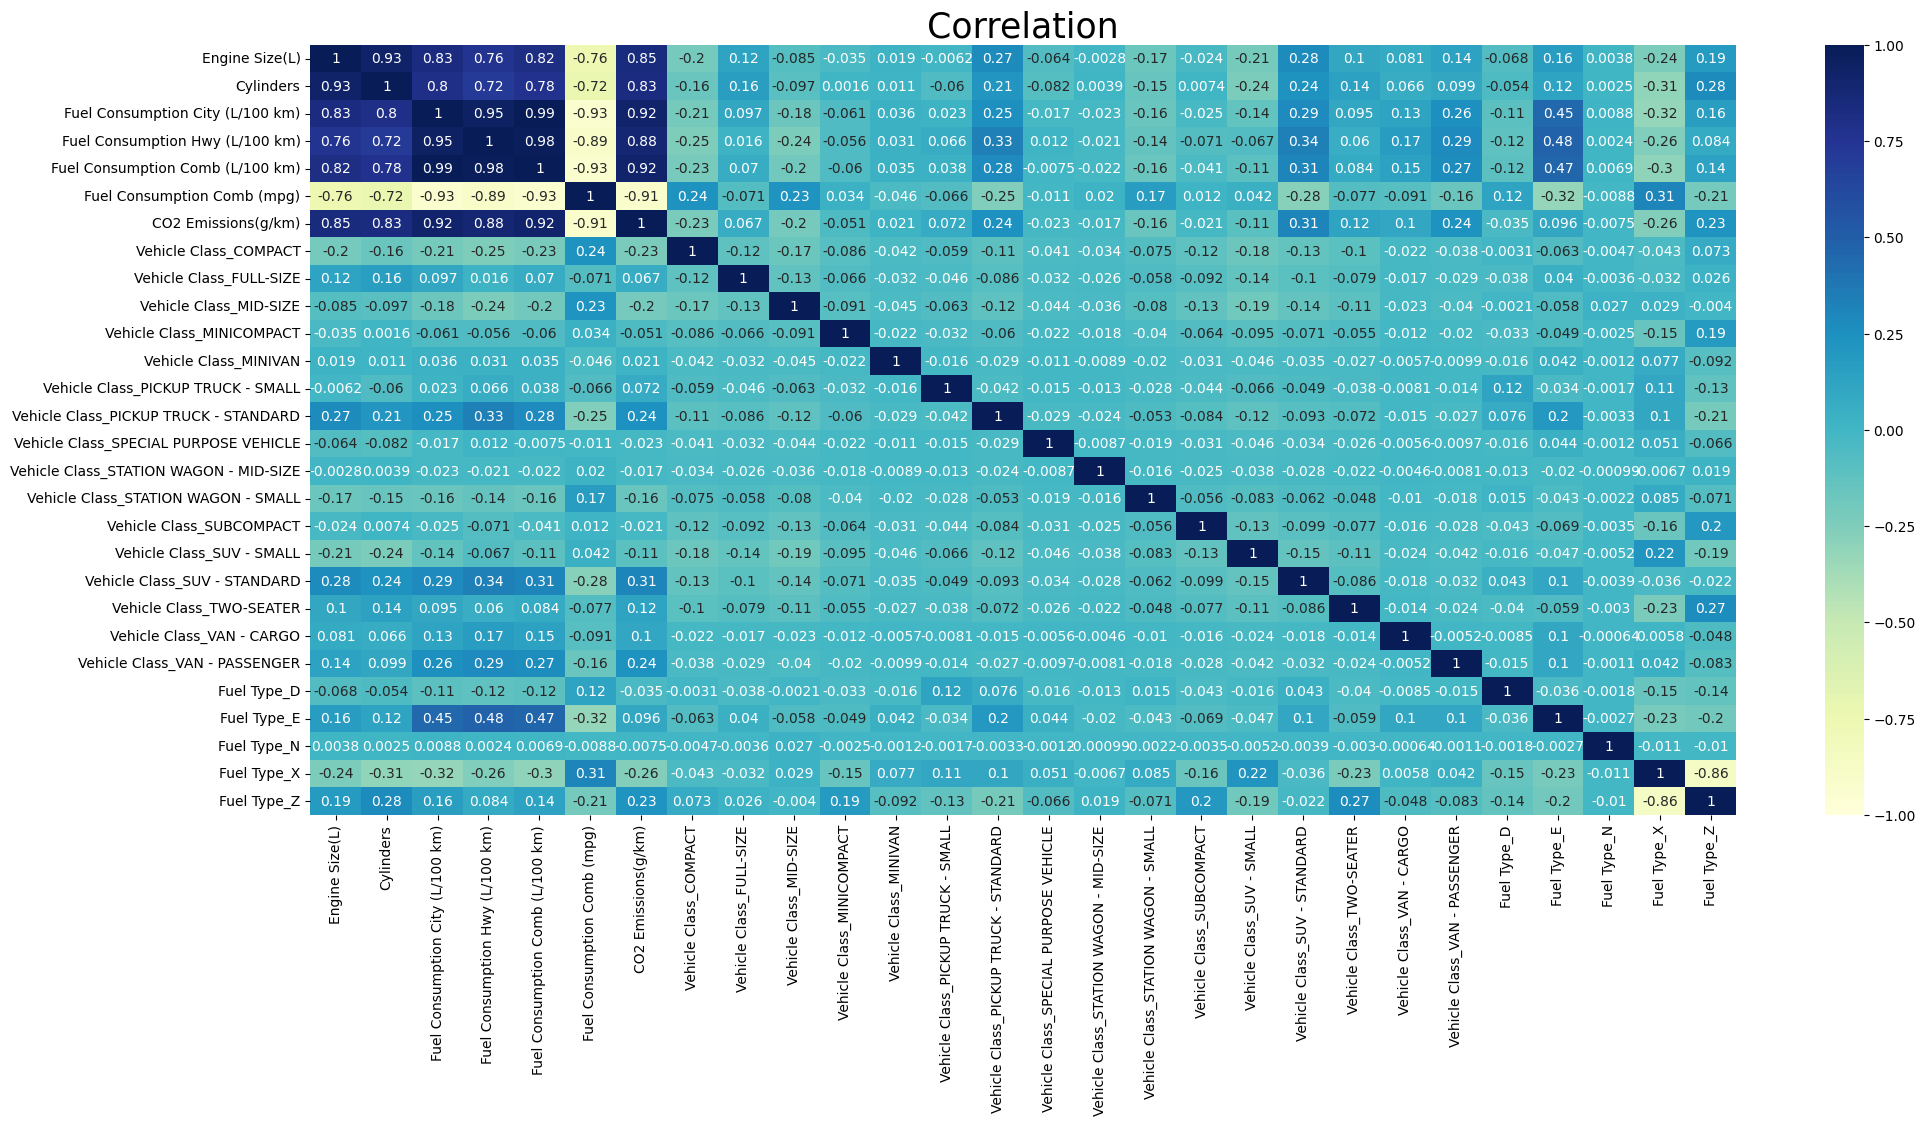

In [ ]:
#heatmap analysis
plt.figure(figsize=(23,10))
heatmap = sns.heatmap(final_df.corr(),vmin=-1, vmax=1 , annot=True, cmap="YlGnBu")
heatmap.set_title("Correlation", fontsize=25)

ดูความสัมพันธ์ของตัวแปรอีกรอบหนึ่งเพื่อเช็คว่าแต่ละ Features มีความสัมพันธ์ต่อ Target ยังไงบ้างเป็น ก่อนที่จะนำไปเทรน
* มีความสัมพันธ์เชิงบวก (ค่าเข้าใกล้ 1)
* มีความสัมพันธ์เชิกลบ (ค่าเข้าใกล้ -1)
* ไม่มีความสัมพันธ์กันหรือมีความสัมพันธ์น้อยมาก (มีค่าเข้าใกล้ 0 หรือมีค่าเท่ากับ 0)


#Create Model Prediction

In [ ]:
# Create Model
lr = LinearRegression() #Linear Model
rf = RandomForestRegressor() #Tree Model

# Train Model
lr.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

# Prediction from model
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
#RMSE
rmse_lr = root_mean_squared_error(Y_test, y_pred_lr)
rmse_rf = root_mean_squared_error(Y_test, y_pred_rf)

print("RMSE Linear Model: ", rmse_lr)
print("RMSE Tree Model: ", rmse_rf)

#R2
r2_lr = r2_score(Y_test, y_pred_lr)
r2_rf = r2_score(Y_test, y_pred_rf)

print("\nR2 Linear Model:", r2_lr)
print("R2 Tree Model:", r2_rf)

#MAE
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
mae_rf = mean_absolute_error(Y_test, y_pred_rf)

print("\nMAE Linear Model:", mae_lr)
print("MAE Tree Model:", mae_rf)

RMSE Linear Model:  3603278747429.525
RMSE Tree Model:  3.3676975035349246

R2 Linear Model: -3.774716318638812e+21
R2 Tree Model: 0.9967027282003295

MAE Linear Model: 93757844113.34674
MAE Tree Model: 1.7704496919865027
